# **Multilabel Classification Model Predicting Shipment Modes**

## **Project Overview**

The transport industry is a critical component of the global economy. The efficient movement of goods is necessary to ensure that businesses can operate effectively and customers can receive their products on time. However, determining the appropriate mode of transport for each shipment can be challenging. It requires considering various factors such as the type of product being transported, the distance, and the destination.
Choosing the appropriate mode of transport for each shipment can significantly affect the delivery time, cost, and safety of the goods being transported.

For example, air transport is generally faster but more expensive than other modes, while sea transport is slower but more cost-effective for large shipments. The wrong choice of transport mode can result in delays, damage to the goods, or increased costs for the business. By accurately predicting the appropriate mode of transport for each shipment, businesses can optimize their logistics operations, reduce costs, and improve customer satisfaction.

To build the machine learning model, we first explore the dataset using BigQuery. We will implement four different approaches to multilabel classification:

Naive independent models - We will build independent models for each label and combine the predictions to determine the appropriate mode of transport.

Classifier chains - We will use a chain of classifiers, where the output of one classifier is fed into the next classifier to predict the labels.

Natively multilabel models - We will use models designed to handle multilabel classification tasks, such as Extra Trees and Neural Networks.

Multilabel to multiclass approach - We will convert the multilabel problem into a multiclass problem by combining different combinations of labels and training the model to predict these combinations. After prediction, we will separate the combinations back into individual labels.

##  **Approach**

* Exploratory Data Analysis (EDA):
  * Understand the features
  * Check the data summary
  * Check for missing or invalid values

* Preprocessing:
  * Encoding the categorical features
  * Split the dataset into training and testing sets


* Create cross-validation sets

* Multilabel Classification:

  * Approach 0 - Naive Independent Models:
    * Train separate binary classifiers for each target label-lightgbm
    * Predict the label
    * Evaluate model performance using the f1 score
  * Approach 1 - Classifier Chains:
    * Train a binary classifier for each target label
    * Chain the classifiers together to consider the dependencies between labels
    * Predict the label
    * Evaluate model performance using the f1 score
  * Approach 2 - Natively Multilabel Models:
    * Train models that can natively handle multiple labels
    * Use models such as Extra Trees and Neural Networks
    * Evaluate model performance using the f1 score
  * Approach 3 - Multilabel to Multiclass Approach:
    * Combine different combinations of labels into a single target label
    * Train a lightgbm classifier on the combined labels
    * Evaluate model performance using f1 score, precision, and recall




# **Tech Stack**
➔ Language: Python

➔ Libraries: pandas, numpy, matplotlib, scikit-learn, tensorflow, Google BigQuery.


## **Install Packages**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install google-cloud-bigquery==3.9.0
!pip install pandas==1.4.4
!pip install pandas_gbq==0.17.9
!pip install numpy==1.22.4
!pip install projectpro --upgrade
!pip install matplotlib==3.7.1
!pip install scikit-learn==1.2.2
!pip install lightgbm==3.3.5
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
!pip install tensorflow-addons==0.20.0

In [ ]:
import pandas as pd
from projectpro import preserve, model_snapshot
from pandas.io import gbq

## **Authentication**

### **Authentication using Colab**

In [ ]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

### **Authentication using Local System**

Once you have created the BigQuery table and added a service account (permissions access to an email id),
you can download the GOOGLE_APPLICATION_CREDENTIALS JSON file from the Google Cloud Console.

Here's how you can download it:

* Go to the Google Cloud Console.
* Select your project and go to the "IAM & admin" section from the left sidebar.
* Click on "Service accounts".
* Create a new service account or select an existing one.
* Click on "Create key" and select "JSON" as the key type.
* Save the JSON file to your local machine.

**Note**: The notebook code has been developed according to Google Colab authentication, which requires the file to be uploaded to Google Drive and opened with Colab to run it. If you want to run it on a local system, you need to provide the necessary credentials while sending the query `gbq.read_gbq(query=query, project_id=project_id, credentials=credentials)`, where credentials is the JSON access key.

Here's the code demonstrating the above:

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/modern-webbing-372717-2ad64eefae93.json'

from google.oauth2 import service_account
# Path to the service account key file
key_path = '/content/modern-webbing-372717-2ad64eefae93.json'

# Set up the credentials object
credentials = service_account.Credentials.from_service_account_file(key_path)

# Set the project ID
project_id = 'modern-webbing-372717'

# Set the SQL query
query = """SELECT * FROM `modern-webbing-372717.Database_0001.transport_shipment_data` LIMIT 10"""

# Use pandas to execute the query and load the results into a DataFrame
df = gbq.read_gbq(query=query, project_id=project_id, credentials=credentials)

# Print the DataFrame
df.head()

,Product_Id,Net_Weight,Size,Value,Storage,Packaging_Cost,Expiry_Period,Length,Height,Width,Volume,Perishable_Index,Flammability_Index,F145,F7987,F992,Air,Road,Rail,Sea
0,8c54Qe7RDn282Mopja7dUq,0.231087,A,-0.489163,0,0.019398,0.749709,-0.444208,0.634931,0.712466,-0.089034,-0.456208,0.832768,-0.136432,-0.444208,-0.089034,1,0,0,0
1,H9bCk95yvkX9CLUYJGy6Ym,0.221333,A,-0.451410,0,0.188049,0.516770,-0.477535,0.502226,0.610333,0.033706,0.018980,0.960931,-0.421503,-0.477535,0.033706,1,0,0,0
2,LmrrXCCbWJPiQHdNWSHxPy,0.142139,A,-0.795507,0,0.035681,0.429083,-0.425405,0.422865,0.513222,0.167365,-0.644823,0.242156,0.930457,99.000000,0.167365,1,1,0,0
3,CH8PdyCWX47XyH7RPPtYdL,0.080169,A,-0.743728,0,0.043605,0.634501,-0.654449,0.382735,0.437001,-0.162875,0.490039,0.708018,-0.017208,-0.654449,NaN,1,0,0,0
4,camXxWbbaGevjqJfgSBx6B,0.046239,A,-0.409716,0,-0.038602,0.682835,-0.341292,0.512774,0.633031,-0.073622,-0.957758,0.096122,0.493155,-0.341292,-0.073622,1,0,0,0


## **Data Exploration and Processing**

Data exploration and processing are crucial steps in any machine learning project. In this project, we explore and preprocess the dataset using GCP BigQuery, which allows us to query large datasets quickly and efficiently. We use SQL queries to get a better understanding of the data, identify any missing values, and select relevant features for our model.


The SQL query` "SELECT * FROM modern-webbing-372717.Database_0001.transport_shipment_data LIMIT 10"` retrieves the first 10 rows of data from the table product_transport in the transport_dataset dataset of the `modern-webbing-372717` project in Google BigQuery.

Here is a brief explanation of the SQL functions used in this query:

* SELECT: This function is used to specify the columns that you want to retrieve from a table. The asterisk (*) is a wildcard that selects all columns.

* FROM: This function is used to specify the table that you want to retrieve data from.
empirical-realm-374307.transport_dataset.product_transport: This is the fully qualified name of the table in the format project_id.dataset_id.table_id.

* LIMIT: This function is used to limit the number of rows that are returned by a query. In this case, it limits the results to the first 10 rows.

In [ ]:
# sample of data
query = """SELECT * FROM `modern-webbing-372717.Database_0001.transport_shipment_data` LIMIT 10"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,Product_Id,Net_Weight,Size,Value,Storage,Packaging_Cost,Expiry_Period,Length,Height,Width,Volume,Perishable_Index,Flammability_Index,F145,F7987,F992,Air,Road,Rail,Sea
0,8c54Qe7RDn282Mopja7dUq,0.231087,A,-0.489163,0,0.019398,0.749709,-0.444208,0.634931,0.712466,-0.089034,-0.456208,0.832768,-0.136432,-0.444208,-0.089034,1,0,0,0
1,H9bCk95yvkX9CLUYJGy6Ym,0.221333,A,-0.451410,0,0.188049,0.516770,-0.477535,0.502226,0.610333,0.033706,0.018980,0.960931,-0.421503,-0.477535,0.033706,1,0,0,0
2,LmrrXCCbWJPiQHdNWSHxPy,0.142139,A,-0.795507,0,0.035681,0.429083,-0.425405,0.422865,0.513222,0.167365,-0.644823,0.242156,0.930457,99.000000,0.167365,1,1,0,0
3,CH8PdyCWX47XyH7RPPtYdL,0.080169,A,-0.743728,0,0.043605,0.634501,-0.654449,0.382735,0.437001,-0.162875,0.490039,0.708018,-0.017208,-0.654449,NaN,1,0,0,0
4,camXxWbbaGevjqJfgSBx6B,0.046239,A,-0.409716,0,-0.038602,0.682835,-0.341292,0.512774,0.633031,-0.073622,-0.957758,0.096122,0.493155,-0.341292,-0.073622,1,0,0,0


In [ ]:
# count number of rows
query = """SELECT COUNT(*) AS NUM FROM `modern-webbing-372717.Database_0001.transport_shipment_data`"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,NUM
0,2000


In [ ]:
# count distinct products
query = """SELECT COUNT(DISTINCT Product_Id) AS Num_Products FROM `modern-webbing-372717.Database_0001.transport_shipment_data`"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,Num_Products
0,2000


So we have as many products as rows!

In [ ]:
# numerical features

columns = ['Net_Weight', 'Value', 'Packaging_Cost', 'Expiry_Period', 'Length', 'Height', 'Width', 'Volume', 'Perishable_Index', 'Flammability_Index', 'F145', 'F7987', 'F992']
selects = [f"\n\t(SELECT '{col}' AS Name, {col} AS Value FROM `modern-webbing-372717.Database_0001.transport_shipment_data`)\n" for col in columns]

query = f"""
SELECT Name, MIN(Value) AS Min, SUM(Value) / COUNT(Value) AS Avg, MAX(Value) AS Max, SUM(CASE WHEN Value IS NULL THEN 1 ELSE 0 END) AS NumMissing
FROM ({'UNION ALL'.join(selects)})
GROUP BY Name
"""

s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head(len(columns))

,Name,Min,Avg,Max,NumMissing
0,F992,-0.959772,0.034505,0.927373,746
1,F7987,-297.000000,1.417082,299.000000,0
2,F145,-0.998497,-0.000811,0.999786,0
3,Flammability_Index,-0.999492,-0.012068,0.999227,0
4,Perishable_Index,-0.997374,0.004832,0.999453,47
5,Volume,-0.959772,0.028498,0.927373,0
6,Height,-0.989023,-0.199589,0.810998,0
7,Width,-0.928478,0.112865,0.876141,0
8,Length,-0.854964,-0.035019,0.888716,0
9,Expiry_Period,-0.640952,0.196590,0.881765,100


In [ ]:
query = """SELECT Size, COUNT(*) AS Num FROM `modern-webbing-372717.Database_0001.transport_shipment_data` GROUP BY 1 ORDER BY 2 DESC"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,Size,Num
0,E,661
1,D,575
2,C,369
3,B,268
4,A,127


In [ ]:
query = """SELECT Storage, COUNT(*) AS Num FROM `modern-webbing-372717.Database_0001.transport_shipment_data` GROUP BY 1 ORDER BY 2 DESC"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,Storage,Num
0,-1,1071
1,0,929


In [ ]:
query = """
SELECT
    AVG(Air) AS Air,
    AVG(Road) AS Road,
    AVG(Rail) AS Rail,
    AVG(Sea) AS Sea
FROM `modern-webbing-372717.Database_0001.transport_shipment_data`"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

,Air,Road,Rail,Sea
0,0.211,0.586,0.4215,0.271


## **Get data from BigQuery & Encode categorical variables**

This code is creating a SQL query to extract data from the product_transport table in BigQuery. The query is selecting certain numerical features, such as weight and value, as well as some categorical feature Size.

In addition to extracting the original Size feature, this query is also performing one-hot encoding on the Size feature, which is essentially converting the categorical variable into a binary vector. For instance, Size_A column will have a value of 1 if the original Size value was A, and 0 otherwise. Similarly, other columns Size_B, Size_C and Size_D will have values of 1 if the original Size value was B, C or D, respectively.


### **One Hot Encoding**

One-hot encoding is a process of representing categorical data in a numerical format that machine learning models can understand. In machine learning, it's common to have categorical data, such as gender, color, or size, that cannot be directly processed by algorithms. One-hot encoding solves this problem by converting categorical data into numerical data, which algorithms can process.

One-hot encoding is achieved by creating a binary column for each possible category in a categorical variable. Each binary column represents a category and is set to 1 if the observation belongs to that category or 0 otherwise. For example, in the given code, the Size categorical variable is one-hot encoded by creating four binary columns (Size_A, Size_B, Size_C, and Size_D) that represent the four possible categories in the Size variable. If an observation belongs to a particular category, the binary column representing that category is set to 1, and all other columns are set to 0.

One-hot encoding is an essential preprocessing step in many machine learning projects, as it allows categorical data to be used as input to machine learning algorithms, which typically expect numerical inputs.

In [ ]:
num_features = ['Net_Weight', 'Value', 'Packaging_Cost', 'Expiry_Period', 'Length', 'Height', 'Width', 'Volume', 'Perishable_Index', 'Flammability_Index', 'F145', 'F7987', 'F992']
labels = ['Air', 'Road', 'Rail', 'Sea']
preserve("715840")
query = f"""
SELECT
    {','.join(num_features)},
    CASE WHEN Size = 'A' THEN 1 ELSE 0 END Size_A,
    CASE WHEN Size = 'B' THEN 1 ELSE 0 END Size_B,
    CASE WHEN Size = 'C' THEN 1 ELSE 0 END Size_C,
    CASE WHEN Size = 'D' THEN 1 ELSE 0 END Size_D,
    {','.join(labels)}
FROM `modern-webbing-372717.Database_0001.transport_shipment_data`"""
s = gbq.read_gbq(query, project_id='modern-webbing-372717')
s.head()

<IPython.core.display.Javascript object>

,Net_Weight,Value,Packaging_Cost,Expiry_Period,Length,Height,Width,Volume,Perishable_Index,Flammability_Index,...,F7987,F992,Size_A,Size_B,Size_C,Size_D,Air,Road,Rail,Sea
0,0.231087,-0.489163,0.019398,0.749709,-0.444208,0.634931,0.712466,-0.089034,-0.456208,0.832768,...,-0.444208,-0.089034,1,0,0,0,1,0,0,0
1,0.221333,-0.451410,0.188049,0.516770,-0.477535,0.502226,0.610333,0.033706,0.018980,0.960931,...,-0.477535,0.033706,1,0,0,0,1,0,0,0
2,0.142139,-0.795507,0.035681,0.429083,-0.425405,0.422865,0.513222,0.167365,-0.644823,0.242156,...,99.000000,0.167365,1,0,0,0,1,1,0,0
3,0.080169,-0.743728,0.043605,0.634501,-0.654449,0.382735,0.437001,-0.162875,0.490039,0.708018,...,-0.654449,NaN,1,0,0,0,1,0,0,0
4,0.046239,-0.409716,-0.038602,0.682835,-0.341292,0.512774,0.633031,-0.073622,-0.957758,0.096122,...,-0.341292,-0.073622,1,0,0,0,1,0,0,0


## **Difference between Multiclass and Multilabel Classification**

Multi-class classification refers to a classification task where the goal is to assign an input data point to one of several pre-defined categories. In multi-class classification, each data point can belong to only one class. Examples of multi-class classification tasks include digit recognition, where the goal is to identify handwritten digits from 0-9, or image classification, where the task is to classify images into different categories such as animals, plants, or buildings.

On the other hand, multi-label classification refers to a classification task where the goal is to assign one or more labels to each input data point. In multi-label classification, each data point can belong to multiple classes. Examples of multi-label classification tasks include text categorization, where a given document can belong to multiple categories such as politics, sports, or entertainment, or image tagging, where an image can be tagged with multiple labels such as "beach," "sunset," "ocean," etc.

When dealing with multilabel classification problems, we have several approaches we can use to handle the problem.

The first approach is the naive independent models approach. In this approach, we build separate models for each label and combine their predictions to determine the appropriate mode of transport. For example, we can train one model to predict whether a product will be transported by air, another model to predict whether it will be transported by road, and so on. The predictions of these models can then be combined to determine the final mode of transport.

The second approach is the classifier chains approach. In this approach, we use a chain of classifiers, where the output of one classifier is fed into the next classifier to predict the labels. For example, we can train a model to predict whether a product will be transported by air, and then use the output of this model as an input to another model that predicts whether it will be transported by road, and so on.

The third approach is the natively multilabel models approach. In this approach, we use models designed to handle multilabel classification tasks, such as Extra Trees and Neural Networks. These models are trained to predict multiple labels simultaneously. The models predict the probability of each label being present in the input. The model outputs a set of predicted probabilities for each label, and a threshold is used to determine which labels to assign to the input.

The fourth approach is the multilabel to multiclass approach. In this approach, we convert the multilabel problem into a multiclass problem by combining different combinations of labels and training the model to predict these combinations. After prediction, we separate the combinations back into individual labels. For example, we can train a model to predict whether a product will be transported by air and road, air and rail, road and rail, and so on. The model can then predict one of these combinations, which can be separated back into individual labels.








In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection, multioutput, metrics
import lightgbm

### **Cross Validation**

Cross-validation is a technique used in machine learning to evaluate the performance of a model on unseen data. The main idea behind cross-validation is to split the available data into subsets for training and testing, ensuring that the model is tested on data that it has not seen before.

The most common type of cross-validation is k-fold cross-validation, where the data is divided into k equally-sized subsets or folds. The model is trained on k-1 of these folds and tested on the remaining fold. This process is repeated k times, with each fold being used as the test set once. The performance of the model is then averaged across all k folds to obtain an estimate of how well the model will generalize to new data.

Cross-validation is done to prevent overfitting, which occurs when a model learns to fit the training data too well and fails to generalize to new data. By using cross-validation, we can get an estimate of how well the model will perform on new data, and can tune the model parameters accordingly to improve its performance.

Cross-validation is also useful when the dataset is small, as it allows us to make better use of the available data by using each sample for both training and testing. It can also be used to compare the performance of different models or algorithms on the same dataset.

In [ ]:
x = s.drop(columns=labels).astype("float32")
y = s[labels]

cv_folds = list(model_selection.KFold(n_splits=5, shuffle=True, random_state=42).split(x))

### **Approach 0: Independent models**

The independent models approach is a method used in multilabel classification tasks, where each label is treated as a separate binary classification problem. In this approach, independent models are trained for each label separately, and the predictions from all the models are combined to predict the final set of labels for a given input.

The process of training independent models is straightforward. Each label is treated as the target variable, and the remaining variables in the dataset are used as input features. A binary classification model is then trained for each label using the appropriate algorithm and hyperparameters. Once all the models have been trained, they are used to predict the labels for the test set.

The final prediction is obtained by combining the predictions of all the models.

One advantage of the independent models approach is that it is simple to implement. However, it does not take into account any dependencies that may exist between the labels. Additionally, it may not perform as well as other methods in situations where the labels are highly correlated.

This code below is implementing the independent models approach using LightGBM as the base classifier. It is using cross-validation to evaluate the performance of the model on the data.

The cv_folds variable contains the indices of the training and validation folds. The code then iterates over each fold and trains a separate model on each fold using the multioutput.MultiOutputClassifier wrapper. This wrapper allows us to train multiple independent models, one for each label.

The model is then trained using the training data from the current fold, and the predict method is used to generate predictions on the validation data. The f1_score function from the metrics module is used to calculate the F1 score for each label separately. The F1 score is a commonly used metric for evaluating the performance of multilabel classifiers.

The average F1 score across all labels is then calculated and appended to the _scores list. The fold index and the average F1 score for that fold are then printed to the console.

After all the folds have been processed, the code calculates and prints the mean F1 score across all folds. This provides an estimate of the overall performance of the model on the data.

In [ ]:
# Initialize an empty list to store f1 scores for each fold
_scores = []
preserve("715840")
# Iterate through each fold using its index and the corresponding training/validation indices
for fold_idx, (idxT, idxV) in enumerate(cv_folds):

    # Define a multioutput classifier model using LGBMClassifier with a random seed of 42
    model = multioutput.MultiOutputClassifier(lightgbm.LGBMClassifier(random_seed=42))

    # Train the model on the training data
    model.fit(x.iloc[idxT], y.iloc[idxT])

    # Generate predictions using the validation data
    p = model.predict(x.iloc[idxV])

    # Calculate the average f1 score for each label using the validation data and the corresponding predictions
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p[:, i].astype(int)) for i in range(4)])

    # Append the average f1 score to the scores list
    _scores.append(avg_f1_score)

    # Print the fold index and the average f1 score
    print("%d\t%.4f" % (fold_idx, avg_f1_score))

# Print the mean f1 score across all folds
print("--------------")
print(" \t%.4f" % np.mean(_scores))

<IPython.core.display.Javascript object>

0	0.8232
1	0.8374
2	0.8260
3	0.8173
4	0.8055
--------------
 	0.8219


### **Approach 1: Classifier chain**

Classifier Chains is an approach used for multilabel classification problems. It involves creating a chain of classifiers that are trained in a specific order based on label dependencies. In this approach, the output of one classifier is fed into the next classifier to predict the labels. The chain of classifiers can be created in various ways such as based on label dependencies, using a random order, or using a pre-defined order.

The Classifier Chains approach can be useful when there are correlations between labels, as it allows the model to consider these correlations when making predictions. However, it can also result in the propagation of errors from one classifier to the next, which can negatively impact the performance of the model.

In [ ]:
_scores = []  # create a list to store F1 scores for each fold

for fold_idx, (idxT, idxV) in enumerate(cv_folds):  # iterate through each fold
    p_list = []  # create a list to store predictions for each repetition
    avg_f1_score_list = []  # create a list to store F1 scores for each repetition

    for rep in range(3):  # repeat the process 3 times
        # create a Classifier Chain model with LightGBM as the base classifier
        model = multioutput.ClassifierChain(lightgbm.LGBMClassifier(random_seed=42), order="random", cv=5)
        # fit the model on training data
        model.fit(x.iloc[idxT].fillna(0.0), y.iloc[idxT])
        # make predictions on validation data
        p_rep = model.predict(x.iloc[idxV].fillna(0.0))
        # store predictions and F1 score for each repetition
        p_list.append(p_rep)
        avg_f1_score_list.append(np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p_rep[:, i].astype(int)) for i in range(4)]))

    # calculate average predictions and F1 score across repetitions
    p = np.stack(p_list, axis=0).mean(0)
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p[:, i].astype(int)) for i in range(4)])
    _scores.append(avg_f1_score)
    # print fold index and F1 scores for each repetition and overall F1 score for the fold
    print("%d\t%.4f | %.4f %.4f %.4f" % (fold_idx, avg_f1_score, avg_f1_score_list[0], avg_f1_score_list[1], avg_f1_score_list[2]))

model_snapshot("715840")
# print the mean F1 score across all folds
print("--------------")
print(" \t%.4f" % np.mean(_scores))


0	0.8157 | 0.8180 0.8180 0.8179
1	0.8412 | 0.8355 0.8438 0.8453
2	0.8213 | 0.8237 0.8259 0.8236
3	0.8145 | 0.8170 0.8140 0.8125
4	0.8063 | 0.8099 0.8079 0.8092


<IPython.core.display.Javascript object>

--------------
 	0.8198


### **Approach 2: Natively Multilabel Models**

Natively multilabel models are specifically designed to handle multilabel classification tasks. These models are different from multiclass classification models, which are designed to classify samples into a single class among multiple possible classes.

One advantage of natively multilabel models is that they can handle high-dimensional output spaces. Also, they can handle label correlations and label dependencies, which are common in many real-world problems. However, the main drawback of these models is that they can be computationally expensive, especially for large output spaces.

Natively multilabel models predict the probability of each label being present in the output. For example, in a multilabel classification problem with three possible labels, the model might output [0.8, 0.3, 0.6], indicating that label 1 has an 80% chance of being present, label 2 has a 30% chance, and label 3 has a 60% chance. The model will make a prediction for each label based on a threshold value. If the predicted probability of a label is above the threshold, it will be considered present in the output, and if it is below the threshold, it will be considered absent. The threshold value is usually set based on a trade-off between precision and recall. A higher threshold value will lead to higher precision (fewer false positives) but lower recall (more false negatives), while a lower threshold value will lead to higher recall (fewer false negatives) but lower precision (more false positives).

### **Extra Trees Classifier**

Extra Trees, also known as Extremely Randomized Trees, is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. The method is similar to Random Forests, but with a few key differences.

Random Forest builds each decision tree using a subset of features selected randomly for each split. This process is known as "feature bagging" or "random subspace method". The algorithm then selects the best split among a random subset of features at each node of the decision tree.

On the other hand, Extra Trees builds each decision tree using the entire set of features, without performing feature selection. Moreover, instead of finding the best split among a random subset of features at each node, Extra Trees selects the split point randomly for each feature, and chooses the one that minimizes the impurity of the split.

These differences motivate the reduction of both bias and variance. On one hand, using the whole original sample instead of a bootstrap replica will reduce bias. On the other hand, choosing randomly the split point of each node will reduce variance.




In [ ]:
from sklearn import ensemble

_scores = [] # initialize a list to store f1 score of each fold

# loop over each fold of the cross-validation
for fold_idx, (idxT, idxV) in enumerate(cv_folds):

    # initialize an ExtraTreesClassifier model
    model = ensemble.ExtraTreesClassifier()

    # fit the model on training data and target labels
    model.fit(x.iloc[idxT].fillna(-100), y.iloc[idxT])

    # predict the target labels on validation data
    p = model.predict(x.iloc[idxV].fillna(-100))

    # calculate f1 score for each label and take average
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p[:, i].astype(int)) for i in range(4)])

    # append the f1 score to the list
    _scores.append(avg_f1_score)

    # print the f1 score of each fold
    print("%d\t%.4f" % (fold_idx, avg_f1_score))

# print the mean f1 score across all folds
print("--------------")
print(" \t%.4f" % np.mean(_scores))

0	0.8083
1	0.8300
2	0.8157
3	0.7910
4	0.7877
--------------
 	0.8065


### **Neural Networks**

Neural networks, also known as artificial neural networks, are a type of machine learning algorithm inspired by the structure and function of the human brain. They are composed of interconnected nodes, or artificial neurons, that are organized into layers to process and analyze data.

The structure of a neural network typically includes an input layer, one or more hidden layers, and an output layer. The input layer is where data is fed into the network, and the output layer produces the final output of the network. The hidden layers are where the majority of the processing takes place and where the neural network learns to identify patterns and make predictions.

Each node in a neural network takes input data, processes it, and produces an output signal that is passed on to other nodes in the network. The processing that occurs within a node is typically composed of two parts: a linear transformation and a nonlinear activation function.

The linear transformation is simply a weighted sum of the inputs to the node, where each input is multiplied by a corresponding weight. The weights determine the strength of the connection between the input and the node and are learned by the neural network during the training process.

The output of the linear transformation is then passed through a nonlinear activation function, which is used to introduce nonlinearity into the neural network. Nonlinearity is important because many real-world problems are inherently nonlinear, and a neural network without nonlinear activation functions would be limited in its ability to model these problems.

There are many different types of activation functions used in neural networks, including sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax. Each activation function has its own strengths and weaknesses and is chosen based on the specific requirements of the problem being solved.

During the training process, the neural network is fed input data along with corresponding output data, and the weights between the nodes are adjusted to minimize the difference between the network's predictions and the actual output. This process is known as backpropagation, and it uses an optimization algorithm such as gradient descent to iteratively adjust the weights until the network produces accurate predictions.

Once the neural network has been trained, it can be used to make predictions on new, unseen data. The input data is fed into the network, and the output of the final layer represents the network's prediction for that input.

#### **Activation Functions**

Activation functions are one of the crucial components of neural networks. They introduce nonlinearity to the model, allowing it to approximate complex functions. Activation functions apply a mathematical operation to the weighted sum of inputs, known as the activation value, and produce an output that passes to the next layer.

The role of activation functions is to introduce non-linearity into the output of a neuron. Without non-linearity, the model would be limited to linear transformations of the input. As a result, the output would be a linear function of the input, which is not suitable for many real-world problems that are highly non-linear in nature.

There are several types of activation functions, some of which are as follows:

* Sigmoid Function: The sigmoid function is one of the oldest activation functions and is still used today. The sigmoid function maps any input to a value between 0 and 1. The sigmoid function is often used in binary classification problems, where the output is either 0 or 1. The sigmoid function is defined as:
$$f(x) = \frac{1}{1 + e^{-x}}$$
where z is the input to the sigmoid function.

* ReLU (Rectified Linear Unit) Function: The ReLU function is one of the most widely used activation functions. The ReLU function sets any negative value in the input to zero and leaves the positive values unchanged. The ReLU function is defined as:
$$f(z) = \max(0, z)$$
where z is the input to the ReLU function.

* Leaky ReLU Function: Leaky ReLU (Rectified Linear Unit) is a type of activation function used in neural networks. It is similar to the standard ReLU function but with a small modification to address a limitation of the standard ReLU function.
The standard ReLU function returns 0 for any negative input and a linear output for positive inputs. However, the problem with the standard ReLU function is that when the input is negative, the gradient of the function is 0, which can lead to a problem known as "dying ReLU." This occurs when the weights in the network become so large that the inputs to the ReLU function are always negative, causing the gradients to be 0 and the weights to stop updating during training.
Leaky ReLU addresses this problem by adding a small slope to the negative part of the function. Specifically, the function returns the input if it is positive, but returns a small fraction (often 0.01) of the input if it is negative. This ensures that the function always has a gradient and prevents the "dying ReLU" problem.
$$f(z) = \max(0.01z, z)$$
where z is the input to the leaky ReLU function. The leaky ReLU function is often used when the ReLU function fails to provide good results.

* Softmax Function: The softmax function is often used in multi-class classification problems, where the output is one of several classes. The softmax function maps the input to a probability distribution over the output classes. The softmax function is defined as:
$$f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$
where $k$ is the number of classes and $x_i$ is the input to the $i$-th class

There are two main stages in the training of neural networks: forward propagation and backpropagation. In forward propagation, the input data is passed through the network to generate a prediction or output. In backpropagation, the error in the prediction is calculated and used to update the weights of the network. This process is repeated iteratively until the error is minimized.

**Forward Propagation**:

In forward propagation, the input data is passed through the network from the input layer to the output layer. Each layer in the network consists of a set of nodes, or neurons, which perform a simple computation on their inputs. The output of one layer is fed as input to the next layer until the final output is produced.

The computation performed by each neuron is based on the activation function applied to the weighted sum of its inputs. The activation function is used to introduce non-linearity into the network, allowing it to model more complex relationships between the input and output data.

**Backpropagation**:

In backpropagation, the error in the prediction is calculated and used to update the weights of the network. The error is typically measured using a loss function, which compares the predicted output with the actual output. The goal of backpropagation is to minimize the loss function by adjusting the weights of the network.

The process of backpropagation involves calculating the derivative of the loss function with respect to the weights of the network. This derivative is then used to update the weights of the network in the opposite direction of the gradient, in order to minimize the loss function.

**Optimizers**:

Optimizers are algorithms used to update the weights of the neural network during the backpropagation process. They are used to find the optimal set of weights that minimize the loss function. There are several different types of optimizers available, each with its own strengths and weaknesses. Some common optimizers include:

* Gradient Descent: Gradient descent is a simple optimizer that works by adjusting the weights of the network in the direction of the negative gradient of the loss function. It is a first-order optimization method and is often used as a baseline for more complex optimizers.

* Stochastic Gradient Descent (SGD): SGD is a variant of gradient descent that updates the weights using a small batch of data at a time, rather than the entire dataset. This can lead to faster convergence and better generalization.

* Adam: Adam is an adaptive optimizer that adjusts the learning rate based on the gradient variance and moving average of the gradients. It is an effective optimizer for a wide range of neural network architectures and is widely used in practice.

* RMSProp: RMSProp is an adaptive optimizer that uses a moving average of the squared gradients to adjust the learning rate. It is effective for dealing with noisy gradients and is widely used in deep learning.

### **Techniques to Counter Overfitting**

Overfitting is a common problem in neural networks, which occurs when a model becomes too complex and starts to memorize the training data rather than learning the underlying patterns. This leads to poor generalization performance on new data. There are several techniques to counter overfitting in neural networks, some of which are:

* Dropout: Dropout is a technique where a random selection of neurons are ignored during training. This technique helps to prevent overfitting by reducing the complex co-adaptations that can occur between neurons. Dropout randomly selects a fraction of the nodes in a layer and sets their output to zero during training. This makes the network more robust and prevents overfitting.

* Data Augmentation: Data augmentation is a technique where we artificially increase the size of our training data by applying various transformations to the data. This helps to prevent overfitting by providing the model with more diverse examples to learn from. Data augmentation can include techniques like flipping, rotation, scaling, cropping, and color jittering.

* Early Stopping: Early stopping is a technique where we stop training the model as soon as the performance on the validation data starts to deteriorate. This helps to prevent overfitting by preventing the model from overfitting to the training data. The idea behind early stopping is to stop training before the model starts to memorize the training data and starts to perform poorly on unseen data.

* Regularization: Regularization is a technique where we add a penalty term to the loss function to prevent the model from overfitting. This is typically achieved by adding an L1 or L2 penalty term to the weights of the model. L1 regularization adds a penalty proportional to the absolute value of the weights while L2 regularization adds a penalty proportional to the square of the weights.

* Batch Normalization: Batch normalization is a technique where we normalize the inputs to a layer to have zero mean and unit variance. This helps to prevent overfitting by reducing the internal covariate shift in the model. Internal covariate shift is when the distribution of inputs to a layer changes during training, which can make it difficult for the model to learn.








### **Sequential Layering**

Sequential model building involves stacking multiple layers one after the other to form a feed-forward network. This architecture is also referred to as a multi-layer perceptron (MLP).

In the given code, we start by importing the necessary libraries, including TensorFlow and Keras, which are the primary deep learning libraries. We also import TensorFlow Addons, which provides additional functionality to TensorFlow. We then split the data into training and validation sets using K-fold cross-validation, where we use a fraction of the data for training and the rest for validation.

Next, we define the architecture of our neural network by creating an instance of a sequential model using the Keras Sequential API. The sequential model is a linear stack of layers, where each layer has an input and an output. The first layer in our model is the normalization layer, which normalizes the input data. We then add three dense layers with ReLU activation and dropout layers in between them to prevent overfitting. The last layer is a dense layer with a sigmoid activation function since we are dealing with binary classification. We then compile the model by specifying the optimizer and loss function.

After compiling the model, we train it using the training data and validate it using the validation data. We train the model for 50 epochs, with a batch size of 32, and evaluate its performance by plotting the training and validation loss. Finally, we predict the labels for the validation data using the trained model and calculate the average F1 score as a performance metric.

0	0.7646
1	0.7473
2	0.7499
3	0.7448
4	0.7579


<IPython.core.display.Javascript object>

--------------
 	0.7529


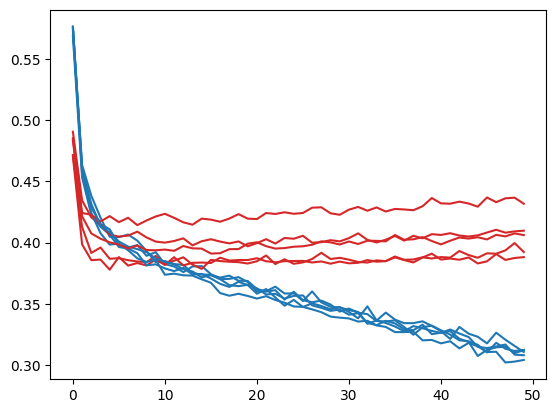

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

_scores = []
for fold_idx, (idxT, idxV) in enumerate(cv_folds):
    norm = keras.layers.Normalization()
    norm.adapt(x.iloc[idxT].fillna(0.0))

    model = keras.Sequential([
        norm,
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(y.shape[-1])
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
    )

    x_train = x.iloc[idxT].fillna(0.0).values.astype('float32')
    y_train = y.iloc[idxT].values.astype('int32')
    x_valid = x.iloc[idxV].fillna(0.0).values.astype('float32')
    y_valid = y.iloc[idxV].values.astype('int32')

    hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=32, verbose=0)
    plt.plot(hist.history['loss'], color='tab:blue')
    plt.plot(hist.history['val_loss'], color='tab:red')

    p_valid = model.predict(x_valid, verbose=0)
    p_valid = (p_valid > 0.0).astype(int)
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p_valid[:, i].astype(int)) for i in range(4)])
    _scores.append(avg_f1_score)
    print("%d\t%.4f" % (fold_idx, avg_f1_score))

model_snapshot("715840")
print("--------------")
print(" \t%.4f" % np.mean(_scores))

0	0.7547
1	0.7601
2	0.7465
3	0.7451
4	0.7545


<IPython.core.display.Javascript object>

--------------
 	0.7522


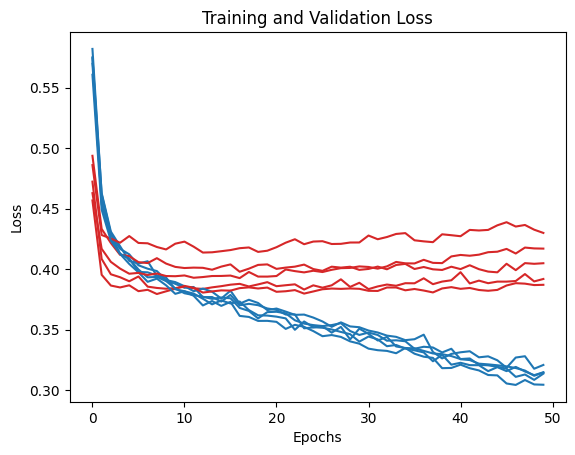

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

_scores = []
for fold_idx, (idxT, idxV) in enumerate(cv_folds):
    norm = keras.layers.Normalization()
    norm.adapt(x.iloc[idxT].fillna(0.0))

    model = keras.Sequential([
        norm,
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(y.shape[-1])
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
    )

    x_train = x.iloc[idxT].fillna(0.0).values.astype('float32')
    y_train = y.iloc[idxT].values.astype('int32')
    x_valid = x.iloc[idxV].fillna(0.0).values.astype('float32')
    y_valid = y.iloc[idxV].values.astype('int32')

    hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=32, verbose=0)
    plt.plot(hist.history['loss'], color='tab:blue', label='Training_Loss')
    plt.plot(hist.history['val_loss'], color='tab:red', label = 'Validation_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')


    p_valid = model.predict(x_valid, verbose=0)
    p_valid = (p_valid > 0.0).astype(int)
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p_valid[:, i].astype(int)) for i in range(4)])
    _scores.append(avg_f1_score)
    print("%d\t%.4f" % (fold_idx, avg_f1_score))

model_snapshot("715840")
print("--------------")
print(" \t%.4f" % np.mean(_scores))

### **Approach 3: Multilabel to Multiclass**

Multilabel classification refers to the task of assigning multiple labels to a single instance. For instance, in the case of an image classification problem, an image can be associated with more than one label. On the other hand, multiclass classification refers to the task of assigning a single label to each instance. For instance, in an image classification problem, an image can only be associated with one label.

In some cases, it may be more appropriate to convert a multilabel classification problem into a multiclass classification problem. This can be done by converting each unique combination of labels into a separate class. The advantage of this approach is that it allows the use of standard classification algorithms that are designed for multiclass classification problems.

Now, let's consider the below code. The first section of the code is converting the multi-label encoded data to multi-class encoded data. It does this by first creating a copy of the original target variable y and then concatenating each row's values using a hyphen (-) separator. This concatenated string is then used as a unique code to identify each combination of the target variable's binary labels. The function drop_duplicates() removes the duplicate codes, and np.arange(y_codes.shape[0]) generates a sequence of integers from 0 to the number of unique codes. These unique codes are then merged back into the original target variable y using the merge() function to replace the binary labels with unique integers.

The second section of the code is training and evaluating a multi-class classification model using the LightGBM algorithm. The model is trained and validated using k-fold cross-validation, where cv_folds are the indices of the training and validation sets for each fold.  After training the model, it generates predictions on the validation set using the predict() function. The predicted integer values are then converted back into the original binary label format using the unique codes generated earlier. Finally, the mean F1 score for each fold is computed and printed.

In [ ]:
y_ = y.copy()
y_['code'] = y.apply(lambda x: '-'.join([str(xi) for xi in x]), axis=1)
y_codes = y_.drop_duplicates()
y_codes['idx'] = np.arange(y_codes.shape[0])
y_class = y_.merge(y_codes, on='code', how='left')['idx']
print(f"{y_codes.shape[0]} classes")

_scores = []
for fold_idx, (idxT, idxV) in enumerate(cv_folds):
    model = lightgbm.LGBMClassifier(random_seed=42)
    model.fit(x.iloc[idxT], y_class.iloc[idxT])

    p = model.predict(x.iloc[idxV])
    p = pd.DataFrame({'idx': p}).merge(y_codes, on='idx', how='left')[labels]
    avg_f1_score = np.mean([metrics.f1_score(y.iloc[idxV].iloc[:, i].to_numpy().astype(int), p.iloc[:, i].astype(int)) for i in range(4)])
    _scores.append(avg_f1_score)
    print("%d\t%.4f" % (fold_idx, avg_f1_score))

model_snapshot("715840")
print("--------------")
print(" \t%.4f" % np.mean(_scores))

15 classes
0	0.8042
1	0.8093
2	0.8018
3	0.8023
4	0.7741


<IPython.core.display.Javascript object>

--------------
 	0.7983


## **Conclusion**

In this project, we explored different approaches to handle multilabel classification problems. We started with exploratory data analysis to understand the features and check for missing or invalid values. Then, we preprocessed the data by encoding categorical features and splitting the dataset into training and testing sets.

Next, we created cross-validation sets and evaluated the performance of four different approaches to handle multilabel classification problems. The first approach was to train separate binary classifiers for each target label, followed by the classifier chains approach where we chained the classifiers together to consider the dependencies between labels. Then, we explored natively multilabel models such as Extra Trees and Neural Networks. Finally, we combined different combinations of labels into a single target label and trained a lightgbm classifier on the combined labels.

This project highlights the importance of choosing an appropriate approach when dealing with multilabel classification problems. While the Naive Independent Models approach is simple to implement. The Classifier Chains approach takes into account the dependencies between labels and can improve model performance. The Natively Multilabel Models approach is specifically designed for multilabel classification problems and can further improve performance.

As observed in the project, the independent model approach performed better compared to the other approaches for this particular dataset. This can be attributed to the fact that the target labels in this dataset, such as sea, air, and road, are relatively independent of each other.

Therefore, it was more effective to train separate binary classifiers for each target label instead of considering the dependencies between them. However, it is important to note that this may not always be the case for other datasets with more complex and interdependent target labels.